In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statistics as stat
from scipy.stats import ttest_rel
from scipy.stats import chi2_contingency

In [2]:
sales=pd.read_csv('Sales_add.csv')

In [3]:
sales.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [4]:
sales.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [5]:
sales.shape

(22, 5)

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [7]:
sales.mean(numeric_only=True)

Sales_before_digital_add(in $)    149239.954545
Sales_After_digital_add(in $)     231123.727273
dtype: float64

# Hypothesis:
  Ho:The sales before and after stepping into digital marketing are same
  
  Ha:The sales after stepping into digital marketing is more.


<Axes: ylabel='Sales_before_digital_add(in $)'>

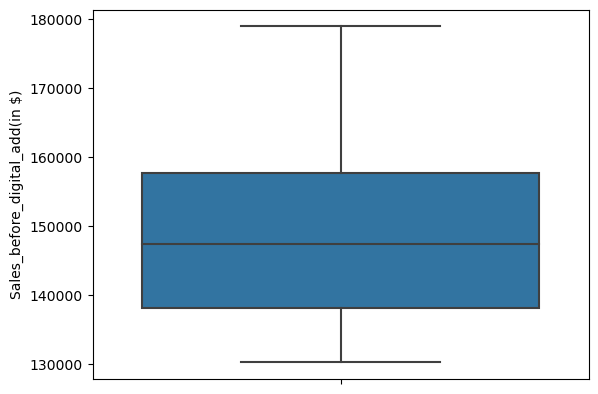

In [8]:
sns.boxplot(y = "Sales_before_digital_add(in $)" , data = sales)

<Axes: ylabel='Sales_After_digital_add(in $)'>

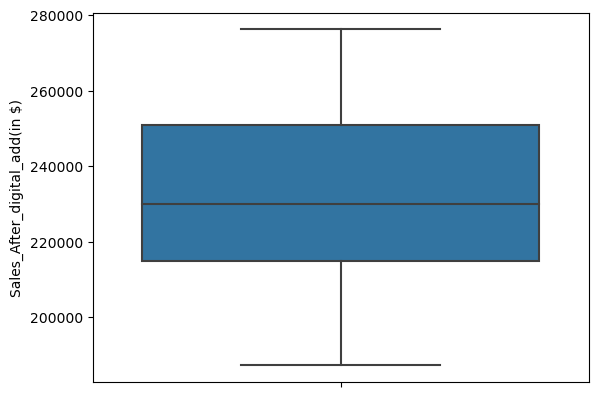

In [9]:
sns.boxplot( y = "Sales_After_digital_add(in $)" , data = sales)

In [10]:
bfor=sales['Sales_before_digital_add(in $)']
aftr=sales['Sales_After_digital_add(in $)']

In [11]:
t_stat,p_val=ttest_rel(bfor, aftr)

In [12]:
print('t_tstat=',t_stat,'\np_val',p_val)

t_tstat= -12.09070525287017 
p_val 6.336667004575778e-11


In [13]:
if p_val<=0.05:
    print('Null hypothesis Rejected')
else:
    print('Null hypothesis Accepted')

Null hypothesis Rejected


# Dependency test
Ho : There is no significant dependency between the Region and the Manager

Ha : There is a significant amount of dependency between the Region and the Manager

In [14]:
tab=pd.crosstab(sales['Region'],sales['Manager'])
tab

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [15]:
chi_stat, p_value, dof, expected = chi2_contingency(tab)

In [16]:
print('chi_stat=',chi_stat, '\np_value=', p_value, '\ndegree of freedom=',dof)

chi_stat= 3.050566893424036 
p_value= 0.5493991051158094 
degree of freedom= 4


In [17]:
if p_value<=0.05:
    print('Null hypothesis Rejected')
else:
    print('Null hypothesis Accepted')

Null hypothesis Accepted



# Conclusion:
1. There was a significant amount of increase in sales generated after the company started investing in Digital Marketing
2. There isn't a significant dependency between the Regions and the Managers associated with the regions